In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('../Datasets/X_Train Without Yeo Johnson 70-30.csv')

# x_test = pd.read_csv('../Datasets/X_Test Without Yeo Johnson 70-30.csv')

# y_train = pd.read_csv('../Datasets/Y_Train Without Yeo Johnson 70-30.csv')

# y_test = pd.read_csv('../Datasets/Y_Test Without Yeo Johnson  70-30.csv')

In [3]:
x_train = pd.read_csv('../Updated Datasets/Update X_Train Without Yeo Johnson 70-30.csv')

x_test = pd.read_csv('../Updated Datasets/Update X_Test Without Yeo Johnson 70-30.csv')

y_train = pd.read_csv('../Updated Datasets/Update Y_Train Without Yeo Johnson 70-30.csv')

y_test = pd.read_csv('../Updated Datasets/Update Y_Test Without Yeo Johnson 70-30.csv')

In [4]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.896617,0.032034,-0.054052,-0.128564,-0.720501,-0.816991,-0.855640,-0.480919,-0.473748,-0.451293,-1.114137
1,0.896617,-1.966008,2.181869,1.504902,0.461613,0.264700,-0.855640,1.386073,1.596949,-0.141839,-1.114137
2,0.896617,0.531544,-0.721925,-0.496462,-0.072245,-0.044354,-0.769694,0.219203,0.250996,-0.451293,0.657481
3,-1.115304,1.930174,2.559363,2.358425,1.376799,0.496491,1.464903,0.452577,-0.266678,0.291397,1.004102
4,0.896617,0.431642,-0.402507,0.106890,2.406382,3.119648,-0.769694,0.919325,-0.163143,0.477069,1.774371
...,...,...,...,...,...,...,...,...,...,...,...
179,-1.115304,0.032034,0.178251,0.077458,-1.101829,-0.121618,-0.769694,1.386073,1.596949,-0.018057,-0.921570
180,-1.115304,-0.567379,-0.489621,-0.746633,-0.987430,0.496491,-0.254017,-0.714293,1.079275,-0.203730,-0.343869
181,0.896617,0.831251,3.582000,4.342622,0.842941,1.500918,0.691389,-0.247545,1.804019,0.043833,1.196669
182,-1.115304,0.531544,0.265365,1.254732,0.042153,-0.507936,0.175713,-0.480919,-0.577283,-0.141839,1.196669


In [5]:
print(y_train['Class'].value_counts())

2    91
0    64
1    29
Name: Class, dtype: int64


# Feature Importance using RF

In [6]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# rfc.fit(x_train, y_train)
# #rfc.fit(x_train_smt, y_train_smt)

# feature_importance = pd.Series(rfc.feature_importances_, index= x_train.columns)
# feature_importance.sort_values(ascending=True)

In [7]:
# feature_importance.nlargest(10).plot(kind='barh')

In [8]:
RF_Top_4_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol']]
RF_Top_5_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG']]
RF_Top_7_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'LDL', 'Urea']]
RF_Top_9_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'LDL', 'Urea', 'Cr', 'VLDL']]
x_train = RF_Top_4_X

In [9]:
RF_Top_4_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol']]
RF_Top_5_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG']]
RF_Top_7_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'LDL', 'Urea']]
RF_Top_9_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'LDL', 'Urea', 'Cr', 'VLDL']]
x_test = RF_Top_4_X

In [10]:
# Feature distribution
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
print(y_train['Class'].value_counts())

2    91
0    64
1    29
Name: Class, dtype: int64


In [12]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [13]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [14]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [15]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.8875
[[29  2  1]
 [ 0 10  1]
 [ 0  5 32]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.59      0.91      0.71        11
           2       0.94      0.86      0.90        37

    accuracy                           0.89        80
   macro avg       0.84      0.89      0.86        80
weighted avg       0.92      0.89      0.90        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9161764705882351
f1 Score  0.8954435630174489
Recall  0.8875
Specificity/TNR: 0.9354838709677419
Cohen Kappa: 0.8212068537372734
AUC Score  0.9861127727225111


In [18]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8875,
  0.9161764705882351,
  0.8875,
  0.8954435630174489,
  0.8212068537372734,
  0.9861127727225111]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.02413764, 0.0118675 , 0.02114291, 0.01635559, 0.01435888,
        0.01137013, 0.01226673, 0.01148095, 0.0199975 , 0.01007202,
        0.01755257, 0.0176511 , 0.02124417, 0.00887558, 0.01126752,
        0.01436093, 0.01854918, 0.00952547, 0.01166818, 0.0139612 ,
        0.02014527, 0.00947382, 0.01525824, 0.01537468, 0.01351364,
        0.01047108, 0.01172895, 0.01210675, 0.01505883, 0.0092741 ,
        0.01246731, 0.013164  , 0.02124217, 0.01406236, 0.01515837,
        0.01580753, 0.01974649, 0.01386182, 0.01196742, 0.01605568,
        0.02558355, 0.01346271, 0.01366277, 0.01361485, 0.02024236,
        0.0198462 , 0.02114284, 0.01545763, 0.01904831, 0.01276577,
        0.02014556, 0.02858787, 0.0333415 , 0.01640112, 0.01758993,
        0.02360003, 0.02714911, 0.01539168, 0.02155352, 0.02444737,
        0.02999115, 0.01679606, 0.01989965, 0.01569676, 0.01745126,
        0.01530056, 0.01518292, 0.01539431, 0.01775146, 0.0149482 ,
        0.01685014, 0.01679335,

In [20]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024138,0.004776,0.004089,0.001916,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.894737,0.842105,...,0.947368,1.000000,0.944444,0.888889,0.944444,0.944444,0.888889,0.924269,0.042603,89
1,0.011867,0.002766,0.002693,0.000639,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.947368,0.894737,...,0.947368,0.944444,0.944444,0.888889,0.944444,0.944444,0.888889,0.929240,0.025214,21
2,0.021143,0.005846,0.003691,0.001548,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",1.000000,0.894737,...,0.947368,0.944444,0.888889,0.944444,0.777778,0.888889,0.888889,0.901754,0.059035,148
3,0.016356,0.005904,0.005686,0.002320,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.684211,0.631579,...,0.789474,0.722222,0.833333,0.888889,0.444444,0.722222,0.722222,0.717544,0.114657,302
4,0.014359,0.003972,0.004289,0.002486,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.789474,0.842105,...,0.894737,0.833333,1.000000,0.833333,0.888889,0.833333,0.833333,0.874854,0.068683,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.017005,0.001190,0.003591,0.001277,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.789474,0.789474,...,0.842105,0.833333,0.833333,0.777778,0.777778,0.833333,0.777778,0.809649,0.027661,210
396,0.026232,0.003602,0.005486,0.003033,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.789474,0.789474,...,0.842105,0.833333,0.833333,0.777778,0.777778,0.833333,0.777778,0.809649,0.027661,210
397,0.022434,0.004337,0.002992,0.000892,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.947368,0.894737,...,0.947368,0.888889,0.944444,0.944444,0.888889,0.944444,0.888889,0.928947,0.035259,39
398,0.021243,0.004162,0.004041,0.001350,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,313


In [21]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.924269
1,1,linear,0.929240
2,1,poly,0.901754
3,1,sigmoid,0.717544
4,1,rbf,0.874854
...,...,...,...
395,20,sigmoid,0.809649
396,20,rbf,0.809649
397,20,linear,0.928947
398,20,poly,0.495029


In [22]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.9459064327485379
{'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}


In [23]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.77      0.91      0.83        11
           2       0.92      0.95      0.93        37

    accuracy                           0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



In [24]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.931756072874494
f1 Score  0.926577868852459
Recall  0.925
Specificity/TNR: 0.9666666666666667
Cohen Kappa: 0.8776446596992098
AUC Score  0.9913224129169845


In [25]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9459064327485379,
  0.931756072874494,
  0.925,
  0.926577868852459,
  0.8776446596992098,
  0.9913224129169845]}

# Logistic Regression Train, Test

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.891
Testing Accuracy: 0.912
[[31  0  1]
 [ 1  7  3]
 [ 0  2 35]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.78      0.64      0.70        11
           2       0.90      0.95      0.92        37

    accuracy                           0.91        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.91      0.91      0.91        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.909508547008547
f1 Score  0.9097368421052632
Recall  0.9125
Specificity/TNR: 1.0
Cohen Kappa: 0.8539384454877412
AUC Score  0.9625234083414695


In [28]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8875,
  0.9161764705882351,
  0.8875,
  0.8954435630174489,
  0.8212068537372734,
  0.9861127727225111],
 'LR': [0.9125,
  0.909508547008547,
  0.9125,
  0.9097368421052632,
  0.8539384454877412,
  0.9625234083414695]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [29]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00508263, 0.01764586, 0.00503781, 0.00787857, 0.00468688,
        0.01785214, 0.00438752, 0.00937524, 0.00478709, 0.01446135,
        0.00668166, 0.01647775, 0.00584118, 0.01606543, 0.00529175,
        0.01465039, 0.00590155, 0.01692171, 0.00578475, 0.01455822,
        0.0054853 , 0.01624403, 0.00524719, 0.01449926, 0.00638409,
        0.01755257, 0.00558476, 0.01405365, 0.00598385, 0.01974654,
        0.01665571, 0.01665492, 0.00758698, 0.02054234, 0.00654292,
        0.01598313, 0.00840354, 0.02044563, 0.00659807, 0.01432452]),
 'std_fit_time': array([0.00137364, 0.00266854, 0.00164808, 0.00113319, 0.00126573,
        0.00620313, 0.0011103 , 0.0017957 , 0.00107431, 0.00268537,
        0.00289239, 0.00268665, 0.00084248, 0.00160468, 0.00118435,
        0.00141768, 0.00096161, 0.00168712, 0.0009775 , 0.00174335,
        0.00091953, 0.00121089, 0.00122674, 0.00150602, 0.0014935 ,
        0.00236829, 0.00079745, 0.00253765, 0.00089212, 0.00504294,
        0.009

In [30]:
df_lr_grid = pd.DataFrame(GSCV_LR.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005083,0.001374,0.002893,0.000699,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.894737,0.789474,...,0.842105,0.833333,0.833333,0.777778,0.888889,0.888889,0.722222,0.836550,0.055716,39
1,0.017646,0.002669,0.002793,0.001163,1.0,l1,saga,"{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}",0.947368,0.842105,...,0.947368,0.888889,0.833333,0.888889,0.888889,0.944444,0.777778,0.890643,0.055620,6
2,0.005038,0.001648,0.002394,0.000798,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.789474,0.789474,...,0.842105,0.833333,0.833333,0.777778,0.833333,0.888889,0.777778,0.820760,0.034176,40
3,0.007879,0.001133,0.002992,0.001545,1.0,l2,saga,"{'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}",0.947368,0.842105,...,0.894737,0.833333,0.888889,0.888889,0.888889,0.888889,0.777778,0.879825,0.048655,20
4,0.004687,0.001266,0.002494,0.000920,2.782559,l1,liblinear,"{'C': 2.7825594022071245, 'penalty': 'l1', 'so...",0.947368,0.842105,...,0.842105,0.888889,0.833333,0.888889,0.888889,0.888889,0.777778,0.864035,0.043865,22
5,0.017852,0.006203,0.004488,0.003193,2.782559,l1,saga,"{'C': 2.7825594022071245, 'penalty': 'l1', 'so...",0.947368,0.842105,...,0.947368,0.888889,0.833333,0.888889,0.888889,0.944444,0.777778,0.890643,0.055620,6
6,0.004388,0.001110,0.002594,0.000914,2.782559,l2,liblinear,"{'C': 2.7825594022071245, 'penalty': 'l2', 'so...",0.894737,0.736842,...,0.842105,0.833333,0.888889,0.777778,0.888889,0.888889,0.722222,0.836842,0.064418,37
7,0.009375,0.001796,0.001994,0.000771,2.782559,l2,saga,"{'C': 2.7825594022071245, 'penalty': 'l2', 'so...",0.947368,0.789474,...,0.947368,0.888889,0.888889,0.888889,0.888889,0.944444,0.777778,0.890936,0.059610,1
8,0.004787,0.001074,0.002095,0.000828,7.742637,l1,liblinear,"{'C': 7.742636826811269, 'penalty': 'l1', 'sol...",0.947368,0.842105,...,0.842105,0.888889,0.833333,0.888889,0.888889,0.888889,0.777778,0.869298,0.044075,21
9,0.014461,0.002685,0.002894,0.001513,7.742637,l1,saga,"{'C': 7.742636826811269, 'penalty': 'l1', 'sol...",0.947368,0.789474,...,0.947368,0.888889,0.833333,0.888889,0.888889,0.944444,0.777778,0.885380,0.062079,8


In [31]:
df_lr_grid[['param_C', 'mean_test_score']]

,param_C,mean_test_score
0,1.0,0.836550
1,1.0,0.890643
2,1.0,0.820760
3,1.0,0.879825
4,2.782559,0.864035
5,2.782559,0.890643
6,2.782559,0.836842
7,2.782559,0.890936
8,7.742637,0.869298
9,7.742637,0.885380


In [32]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.89093567251462
{'C': 2.7825594022071245, 'penalty': 'l2', 'solver': 'saga'}


In [33]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.82      0.82      0.82        11
           2       0.92      0.95      0.93        37

    accuracy                           0.94        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.94      0.94      0.94        80



In [34]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9384868421052632
f1 Score  0.9378174603174603
Recall  0.9375
Specificity/TNR: 1.0
Cohen Kappa: 0.8969337799536202
AUC Score  0.9720868461803908


In [35]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9459064327485379,
  0.931756072874494,
  0.925,
  0.926577868852459,
  0.8776446596992098,
  0.9913224129169845],
 'LR': [0.89093567251462,
  0.9384868421052632,
  0.9375,
  0.9378174603174603,
  0.8969337799536202,
  0.9720868461803908]}

# KNN Train, Test

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.875
0.875
[[29  0  3]
 [ 2  8  1]
 [ 1  3 33]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.73      0.73      0.73        11
           2       0.89      0.89      0.89        37

    accuracy                           0.88        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.88      0.88      0.88        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [37]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.875
f1 Score  0.875
Recall  0.875
Specificity/TNR: 1.0
Cohen Kappa: 0.7941327843540916
AUC Score  0.9452688527788059


In [38]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8875,
  0.9161764705882351,
  0.8875,
  0.8954435630174489,
  0.8212068537372734,
  0.9861127727225111],
 'LR': [0.9125,
  0.909508547008547,
  0.9125,
  0.9097368421052632,
  0.8539384454877412,
  0.9625234083414695],
 'KNN': [0.875, 0.875, 0.875, 0.875, 0.7941327843540916, 0.9452688527788059]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [39]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.01954858, 0.01225584, 0.00765135, 0.01249318, 0.00870101,
        0.02945209, 0.02110174, 0.01546562, 0.01555512, 0.01510785,
        0.01309314, 0.01579692, 0.01104999, 0.00974343, 0.01020339,
        0.00975292, 0.00914636, 0.00926604, 0.00874891, 0.00873621,
        0.01913502, 0.01729884, 0.01045241, 0.01104681, 0.00620568,
        0.00970981, 0.00660968, 0.01160033, 0.01260121, 0.00875058,
        0.01229095, 0.0090517 , 0.01161537, 0.00774777, 0.00640008,
        0.00724921, 0.01359487, 0.00870097, 0.01019692, 0.00800874,
        0.00954885, 0.01009417, 0.01029356, 0.00959702, 0.00880291,
        0.00745363, 0.00700195, 0.00793695, 0.00839646, 0.00929337,
        0.01254542, 0.00725992, 0.0069021 , 0.0138561 , 0.00849936,
        0.00859725, 0.00870664, 0.01100473, 0.00569849, 0.01233556,
        0.01261089, 0.01320927, 0.01120443, 0.00725658, 0.01100869,
        0.00969801, 0.00644453, 0.00714324, 0.00831063, 0.00809929,
        0.0084532 , 0.00844584,

In [40]:
df_knn_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_knn_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019549,0.013655,0.014412,0.009765,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.894737,0.894737,...,0.947368,0.944444,0.888889,0.944444,1.000000,0.944444,0.944444,0.924561,0.042004,7
1,0.012256,0.007185,0.012746,0.012402,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.894737,0.894737,...,0.947368,0.944444,0.888889,0.944444,1.000000,0.944444,0.944444,0.924561,0.042004,7
2,0.007651,0.003223,0.007601,0.003955,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.789474,0.842105,...,0.894737,0.777778,0.888889,0.833333,0.944444,0.888889,0.888889,0.859064,0.048907,96
3,0.012493,0.011040,0.010203,0.006902,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.894737,0.894737,...,0.947368,0.944444,0.888889,0.944444,1.000000,0.944444,0.944444,0.924561,0.042004,7
4,0.008701,0.003237,0.021600,0.024692,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.894737,0.842105,...,0.947368,0.944444,0.888889,0.888889,0.888889,0.833333,0.888889,0.891228,0.034344,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.010557,0.008697,0.006350,0.005076,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.894737,0.894737,...,0.894737,0.833333,0.944444,0.833333,0.888889,1.000000,0.833333,0.896491,0.052570,42
116,0.007988,0.006701,0.011253,0.016105,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.842105,0.842105,...,0.947368,0.833333,0.944444,0.833333,0.888889,0.944444,0.777778,0.869591,0.055636,75
117,0.006190,0.001524,0.004505,0.002193,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.894737,0.894737,...,0.894737,0.888889,0.944444,0.833333,0.888889,1.000000,0.833333,0.896784,0.045955,40
118,0.012251,0.010239,0.007301,0.005157,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.842105,0.842105,...,0.947368,0.833333,0.944444,0.777778,0.888889,0.888889,0.777778,0.858480,0.056216,100


In [41]:
df_knn_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.924561
1,minkowski,1,0.924561
2,minkowski,2,0.859064
3,minkowski,2,0.924561
4,minkowski,3,0.891228
...,...,...,...
115,manhattan,18,0.896491
116,manhattan,19,0.869591
117,manhattan,19,0.896784
118,manhattan,20,0.858480


In [42]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.9406432748538013
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [43]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.60      0.82      0.69        11
           2       0.94      0.89      0.92        37

    accuracy                           0.85        80
   macro avg       0.80      0.84      0.82        80
weighted avg       0.87      0.85      0.85        80



In [44]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8652380952380951
f1 Score  0.854634511993383
Recall  0.85
Specificity/TNR: 0.8666666666666667
Cohen Kappa: 0.7587939698492463
AUC Score  0.9605771723974296


In [45]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9459064327485379,
  0.931756072874494,
  0.925,
  0.926577868852459,
  0.8776446596992098,
  0.9913224129169845],
 'LR': [0.89093567251462,
  0.9384868421052632,
  0.9375,
  0.9378174603174603,
  0.8969337799536202,
  0.9720868461803908],
 'KNN': [0.9406432748538013,
  0.8652380952380951,
  0.85,
  0.854634511993383,
  0.7587939698492463,
  0.9605771723974296]}

# Result of all classifiers

In [46]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.887500,0.912500,0.875000
1,Precision,0.916176,0.909509,0.875000
2,Recall,0.887500,0.912500,0.875000
3,F1 Score,0.895444,0.909737,0.875000
4,Cohen Kappa,0.821207,0.853938,0.794133
5,AUC,0.986113,0.962523,0.945269


# Result of all classifiers after hyperparameter tuning 

In [47]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.945906,0.890936,0.940643
1,Precision,0.931756,0.938487,0.865238
2,Recall,0.925000,0.937500,0.850000
3,F1 Score,0.926578,0.937817,0.854635
4,Cohen Kappa,0.877645,0.896934,0.758794
5,AUC,0.991322,0.972087,0.960577


# Extracting Result

In [48]:
performance_df = performance_df.transpose()
performance_df.to_csv("../Final CSV Without YJ/Without Yeo Johnson 70-30 Applying RF Top 4 features.csv")

performance_df_grid = performance_df_grid.transpose()
performance_df_grid.to_csv("../Final CSV Without YJ/Without Yeo Johnson 70-30 Applying Hyperparameter RF Top 4 features.csv")

# ROC Curve

In [49]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

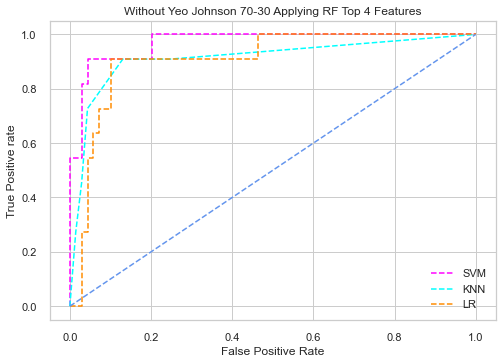

In [50]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('Without Yeo Johnson 70-30 Applying RF Top 4 Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig("../Final ROC Without YJ/Without Yeo Johnson 70-30 Applying RF Top 4 Features.png", dpi=300)

plt.show();